In [1]:
# 라이브러리 
import pandas as pd

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

In [3]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

id                                            name   host_id  \
0  14963583          Room in South Harlem near Central Park  94219511   
1   9458704  Large 1BR Apartment, near Times Sq (2nd Floor)  49015331   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0    Gilles           Manhattan          Harlem  40.80167  -73.95781   
1     Iradj           Manhattan  Hell's Kitchen  40.76037  -73.99016   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     70               3                  3  2019-01-01   
1  Entire home/apt    240               2                 64  2019-06-30   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.09                               2                 0  
1               1.68                               2               262

id                                               name   host_id  \
0  30913224  Cozy and Sunny Room Williamsburg, Luxury Building  33771081   
1    971247                   Sunny Artist Live/Work Apartment   5308961   

  host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0      Rémy            Brooklyn     Williamsburg  40.70959  -73.94652   
1     Larry           Manhattan  Upper West Side  40.79368  -73.96487   

         room_type  minimum_nights  number_of_reviews last_review  \
0     Private room               3                  2  2019-05-08   
1  Entire home/apt               3                159  2019-07-03   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.31                               1                 0  
1               2.09                               1               244

In [5]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [7]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

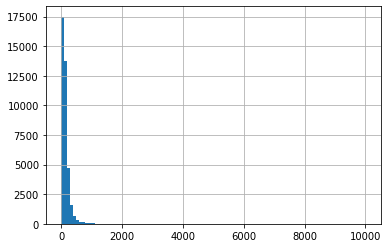

In [8]:
# target(hist)
train['price'].hist(bins=100)

In [9]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [10]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [11]:
# 결측치 컬럼 삭제(last_review)
train = train.drop(labels='last_review', axis=1)
test = test.drop(labels='last_review', axis=1)

In [12]:
# 결측치 채우기
train = train.fillna(0)
test = test.fillna(0)

In [13]:
# 결측치 확인
train.isnull()
test.isnull()

id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0     False  False    False      False                False          False   
1     False  False    False      False                False          False   
2     False  False    False      False                False          False   
3     False  False    False      False                False          False   
4     False  False    False      False                False          False   
...     ...    ...      ...        ...                  ...            ...   
9774  False  False    False      False                False          False   
9775  False  False    False      False                False          False   
9776  False  False    False      False                False          False   
9777  False  False    False      False                False          False   
9778  False  False    False      False                False          False   

      latitude  longitude  room_type  minimum_nights  number_of_reviews  \
0        False      False      False           False              False   
1        False      False      False           False              False   
2        False      False      False           False              False   
3        False      False      False           False              False   
4        False      False      False           False              False   
...        ...        ...        ...             ...                ...   
9774     False      False      False           False              False   
9775     False      False      False           False              False   
9776     False      False      False           False              False   
9777     False      False      False           False              False   
9778     False      False      False           False              False   

      reviews_per_month  calculated_host_listings_count  availability_365  
0                 False                           False             False  
1                 False                           False             False  
2                 False                           False             False  
3                 False                           False             False  
4                 False                           False             False  
...                 ...                             ...               ...  
9774              False                           False             False  
9775              False                           False             False  
9776              False                           False             False  
9777              False                           False             False  
9778              False                           False             False  

[9779 rows x 14 columns]

In [14]:
target = train['price']
train = train.drop('price', axis =1)

In [15]:
cols = [
    'host_id',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

train = train[cols]
test = test[cols]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=20)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

70820.42659375044

In [18]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.10967e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


70821.60225350011

In [19]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

71429.85944847093

In [20]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

72206.0184281587

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

69476.39120210889

In [22]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


71767.38486710798

In [23]:
y_test = pd.read_csv('/aiffel/data/y_test.csv')

pred = model.predict(test)
mean_squared_error(y_test, pred)

49908.32911146415